In [57]:
from src.SimpleEC import SimpleEC
from src.knr import KNNR, wsplit
from matplotlib import pyplot as plt
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [58]:
x = np.linspace(0, 100, 5000)
rng = rnd.RandomState(42)
y = np.sin(4 * x) + rnd.uniform(size=len(x))+np.cos(x**2)

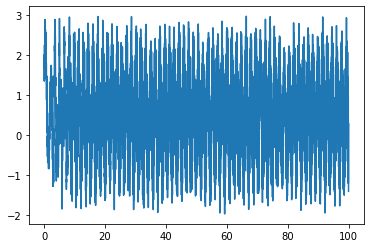

In [59]:
plt.plot(x,y)

In [60]:
#m,tau=7,1
m,tau,k,w,d=2,19,2,'distance','minkowski'
data,target=wsplit(y,m,tau)
train = data[:-100]
y_train = target[:-100]
y_test = target[-100:]
n,nt=len(y_train),len(y_test)
knr=KNNR(m,tau,k=k,w=w,d=d)

In [61]:
knr=knr.fit(train,y_train)
Y=knr.predict(100)
Y=np.nan_to_num(Y,np.mean(Y))

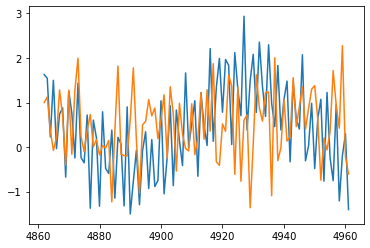

In [62]:
#plt.plot(range(n),y_train)
plt.plot(range(n,n+nt),y_test)
plt.plot(range(n,n+nt),Y)

In [63]:
def fitpred(m,tau,k,w,d,**kwargs):
    kw,kd=int(w),int(d)
    m,tau,k=int(m),int(tau),int(k)
    W={0:'distance',1:'uniform'}
    D={0:'cosine',1:'euclidean',2:'correlation',3:'chebyshev'}
    #print(m,tau,k,W[kw],D[kd])
    y=kwargs['y']
    n=kwargs['n']
    #print(y.shape)
    data,target=wsplit(y,m,tau)
    #print(data.shape,target.shape)
    train = data[:-n]
    y_train = target[:-n]
    y_test = target[-n:]
    #print(y_train.shape,y_test.shape)
    knr=KNNR(m=m,tau=tau,k=k,w=W[kw],d=D[kd])
    knr.fit(train,y_train)
    y_pred=knr.predict(n)
    y_pred=np.nan_to_num(y_pred,np.mean(y_pred))
    return mse(y_test,y_pred)
    
    

In [64]:
ec=SimpleEC(fitpred,[(1,32),(1,33),(1,16),(0,1),(0,3)], population_size=64,
            code_size=[5,5,4,1,2], **{'y':y,'n':50},np=2)

In [35]:
best,avg=ec.evolve(t=20)

Generation: 0, Best: 0.12740466875713694, Avg: 0.5358057968977853
Generation: 5, Best: 0.10595404710172479, Avg: 0.32942292001739926
Generation: 10, Best: 0.10872807278006245, Avg: 0.2534817115820219
Generation: 15, Best: 0.12021008472563793, Avg: 0.17482352102526552


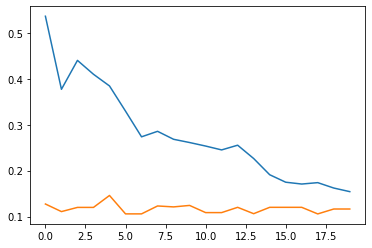

In [50]:
plt.plot(best)
plt.plot(avg)

In [38]:
np.sqrt(5000)

70.71067811865476